In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from trees import Tree, kNT

# Checking for accuracy on given example


Example from https://arxiv.org/pdf/2312.04123

<img src="knt_example.png" width="700px">

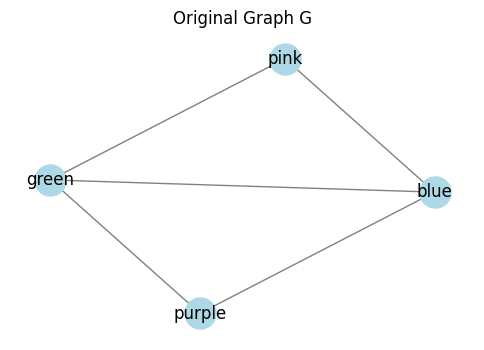

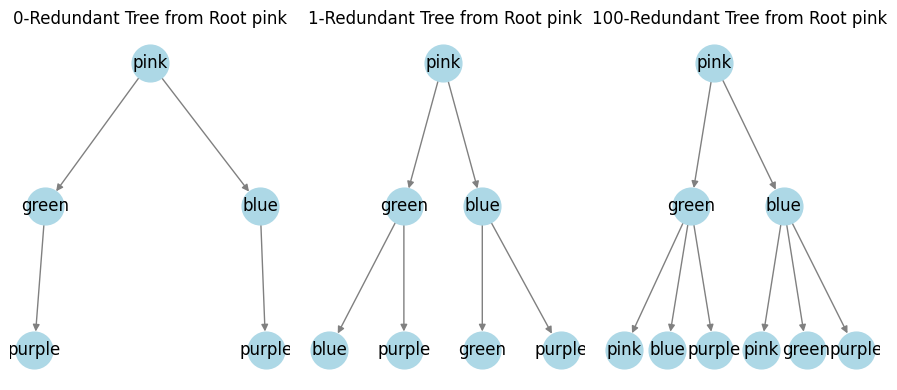

In [2]:
# Adjacency list from Figure 3
adjacency_list = {
    'pink': ['green', 'blue'],
    'green': ['blue', 'purple'],
    'blue': ['purple'],
    'purple': []
}

G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

fig, ax = plt.subplots(figsize=(6, 4))
# G_nx = nx.Graph(G.adjacency_list)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
plt.title("Original Graph G")
plt.show()

# Example height was 2 and root was 'pink'
w = 'pink'
h = 2
fig, ax = plt.subplots(1, 3, figsize=(9, 4))
ks = [0, 1, 100]
for i in range(len(ks)):
    k = ks[i]
    tree = kNT(G, w, k, h)
    tree.plot_tree_with_ax(ax[i])
plt.tight_layout()
plt.show()

# Testing on other types of graphs

## Repeated node labels

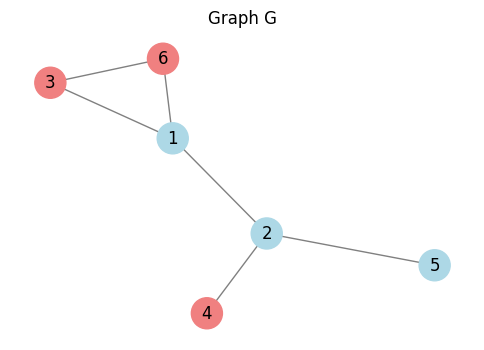

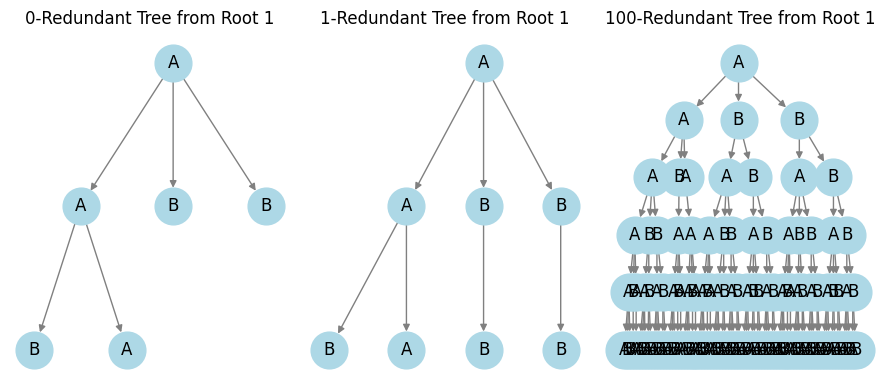

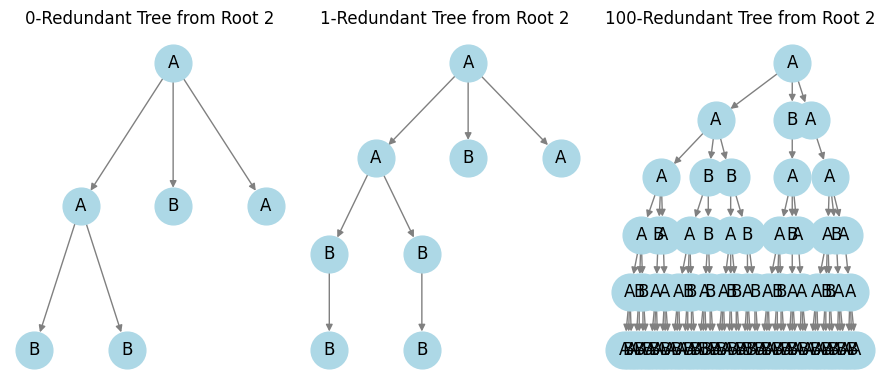

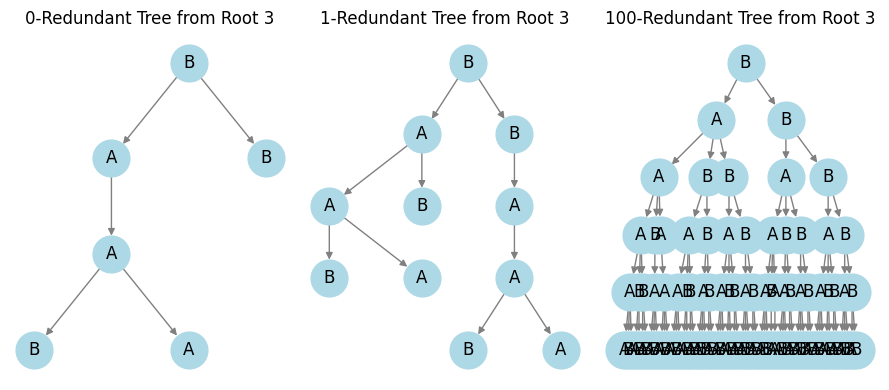

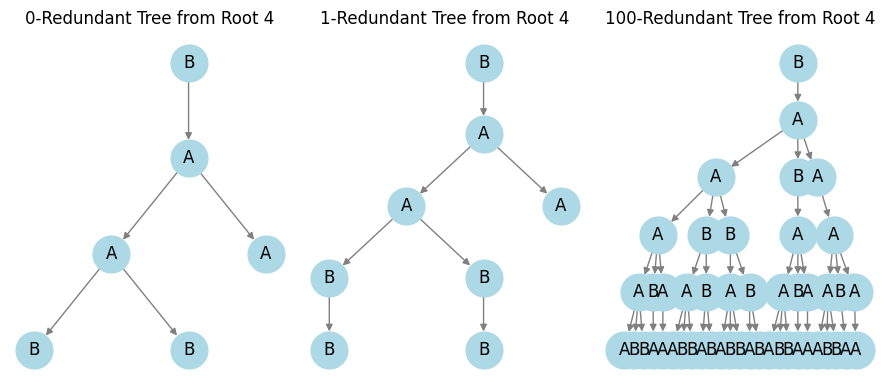

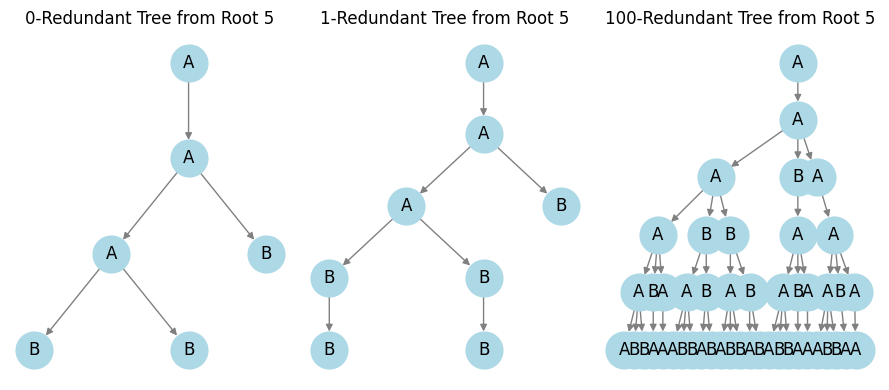

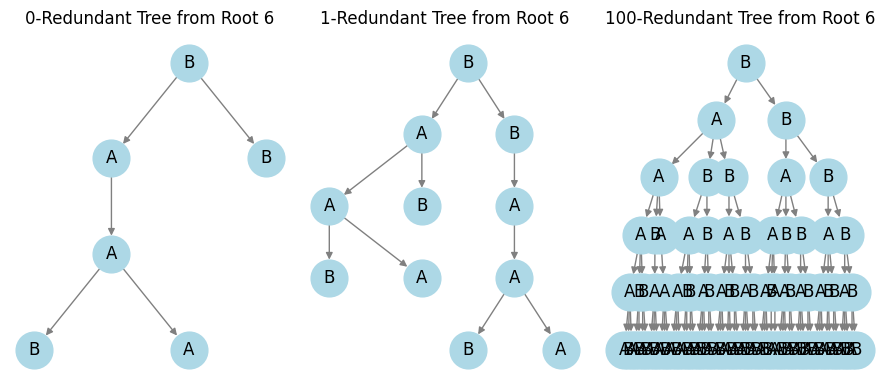

In [3]:
# Random adjacency list
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

# Repeated node labels: A or B
node_labels = {
    '1': 'A',
    '2': 'A',
    '3': 'B',
    '4': 'B',
    '5': 'A',
    '6': 'B'
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)


# Give different colors to the different labels so we visually check the TPTs
# Because I don't know how to make the shown label have both the node label and unique identifier
node_colors = ['lightblue' if node_labels[node] == 'A' else 'lightcoral' for node in G.nodes]

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
# G_nx = nx.Graph(G.adjacency_list)
nx.draw(G, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

for i in range(len(possible_roots)):
    w = possible_roots[i]
    fig, ax = plt.subplots(1, 3, figsize=(9, 4))
    ks = [0, 1, 100]
    for i in range(len(ks)):
        k = ks[i]
        max_height = 5
        tree = kNT(G, w, k, max_height)
        # The next two lines use the node labels
        # Without them you can make sure that the tree is constructed right based on unique identifiers
        # With them you can make sure that the node labels are being put on correctly for the tree
        for node in tree.nodes:
            tree.node_labels[node]['name'] = node_labels[node.split('_')[0]]
        tree.plot_tree_with_ax(ax[i])
    plt.tight_layout()
    plt.show()

## No Node Labels

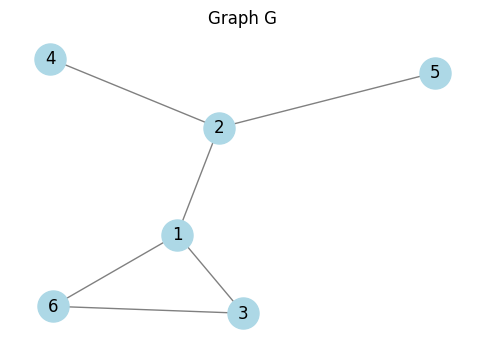

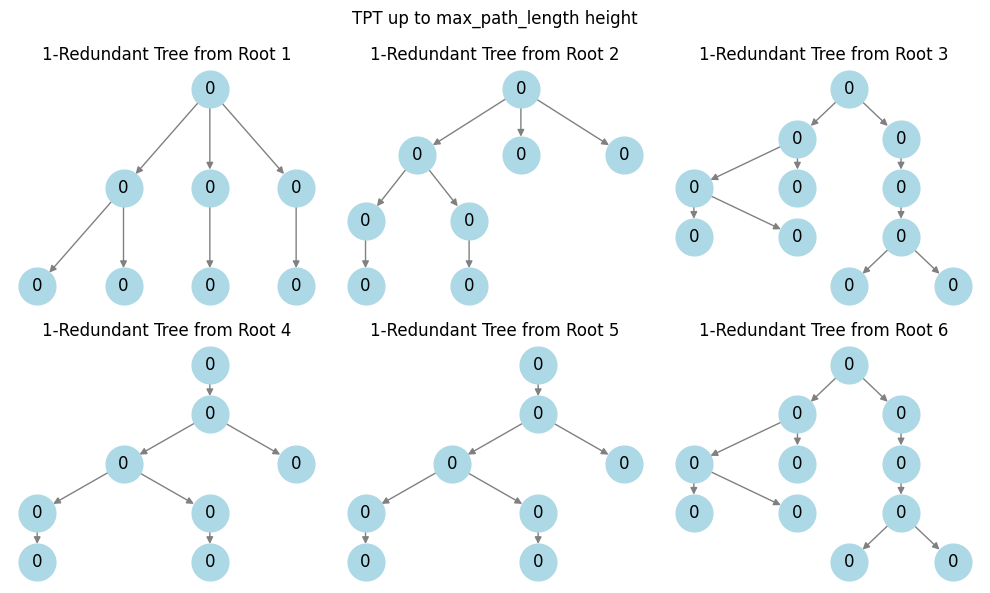

In [4]:
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
# G_nx = nx.Graph(G.nodes)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

# Plotting the kNTs
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle(f'TPT up to max_path_length height')

k = 1
for i in range(2):
    for j in range(3):
        w = possible_roots[i * 3 + j]
        knt = kNT(G, w, k)
        for node in knt.unfolding_tree.nodes():
            # Treat all nodes as having the same label '0'
            knt.node_labels[node] = {'name': '0'}
        knt.plot_tree_with_ax(axes[i, j])

plt.tight_layout()
plt.show()
